In [43]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
plt.style.use("seaborn-darkgrid")

In [44]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is ACC0-1167

 Directory of C:\Users\shand\Documents\Siddy\ExcelR\Assignment\Simple Linear Regression

18-02-2022  23:45    <DIR>          .
13-02-2022  20:53    <DIR>          ..
05-01-2022  20:44    <DIR>          .ipynb_checkpoints
05-01-2022  20:27               218 delivery_time.csv
05-01-2022  20:27               318 Problem_statements.txt
05-01-2022  20:27               454 Salary_Data.csv
18-02-2022  23:45           132,968 Simple Linear Regression.ipynb
               4 File(s)        133,958 bytes
               3 Dir(s)  205,686,358,016 bytes free


## Delivery time

In [45]:
df = pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [46]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

<AxesSubplot:>

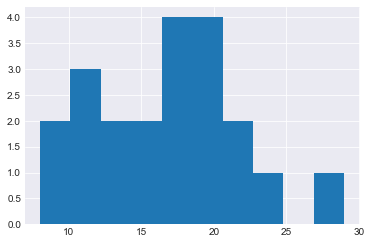

In [47]:
df["Delivery Time"].hist()

<AxesSubplot:>

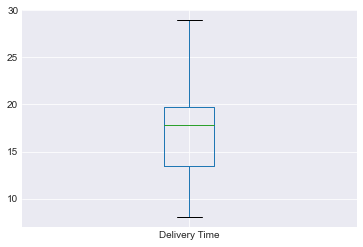

In [48]:
df.boxplot(column = ["Delivery Time"])

<AxesSubplot:>

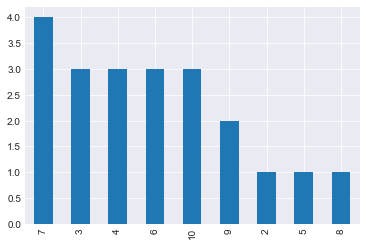

In [49]:
df["Sorting Time"].value_counts().plot.bar()

In [50]:
df.shape

(21, 2)

In [51]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


### Using sklearn

In [52]:
lm = LinearRegression()
X = df["Sorting Time"].values.reshape(21,1)
Y = df["Delivery Time"].values.reshape(21,1)

In [108]:
df_sklearn = lm.fit(X,Y)
print(df_sklearn.coef_)
print(df_sklearn.intercept_)

[[1.6490199]]
[6.58273397]


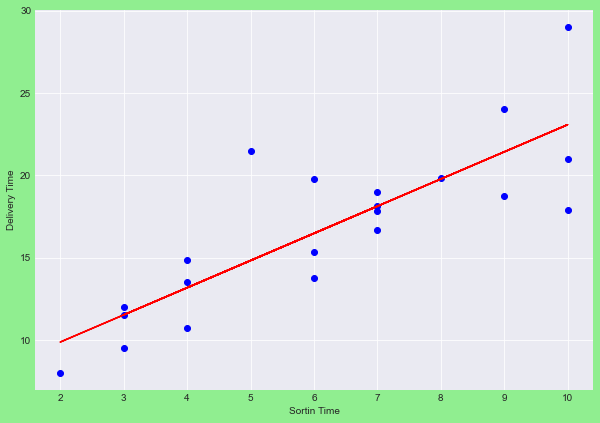

In [109]:
plt.figure(figsize = (10,7), facecolor = "lightgreen")
plt.scatter(df["Sorting Time"], df["Delivery Time"], color = "blue")
plt.plot(df["Sorting Time"], df["Sorting Time"]*df_sklearn.coef_[0]+df_sklearn.intercept_, color = "red")
plt.xlabel("Sortin Time")
plt.ylabel("Delivery Time")
plt.show()

In [110]:
pred_time_lm = df_sklearn.predict(X)
r2_score(Y, pred_time_lm)

0.6822714748417231

### Using Statsmodels

In [111]:
Time_model1 = smf.ols('Q("Delivery Time") ~ Q("Sorting Time")', data = df).fit()
Time_model1.params

Intercept            6.582734
Q("Sorting Time")    1.649020
dtype: float64

In [112]:
Time_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Delivery Time")   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        00:32:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.5827      1.722      3.823      0.001       2.979      10.186
Q("Sorting Time")     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
Time_model2 = smf.ols('np.log(Q("Delivery Time")) ~ Q("Sorting Time")', data = df).fit()
Time_model2.params

Intercept            2.121372
Q("Sorting Time")    0.105552
dtype: float64

In [114]:
Time_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(Q("Delivery Time"))   R-squared:                       0.711
Model:                                    OLS   Adj. R-squared:                  0.696
Method:                         Least Squares   F-statistic:                     46.73
Date:                        Sat, 19 Feb 2022   Prob (F-statistic):           1.59e-06
Time:                                00:32:20   Log-Likelihood:                 7.7920
No. Observations:                          21   AIC:                            -11.58
Df Residuals:                              19   BIC:                            -9.495
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.1214      0.103     20.601      0.000       1.906       2.337
Q("Sorting Time")     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
Time_model3 = smf.ols('Q("Delivery Time") ~ np.log(Q("Sorting Time"))', data = df).fit()
Time_model3.params

Intercept                    1.159684
np.log(Q("Sorting Time"))    9.043413
dtype: float64

In [116]:
Time_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Delivery Time")   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           2.64e-06
Time:                        00:32:21   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Q("Sorting Time"))     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
df["Sorting Time_sq"] = df["Sorting Time"]**2
Time_model4 = smf.ols('np.log(Q("Delivery Time")) ~ Q("Sorting Time")+Q("Sorting Time_sq")', data = df).fit()
Time_model4.params

Intercept               1.699704
Q("Sorting Time")       0.265922
Q("Sorting Time_sq")   -0.012841
dtype: float64

In [118]:
Time_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(Q("Delivery Time"))   R-squared:                       0.765
Model:                                    OLS   Adj. R-squared:                  0.739
Method:                         Least Squares   F-statistic:                     29.28
Date:                        Sat, 19 Feb 2022   Prob (F-statistic):           2.20e-06
Time:                                00:32:22   Log-Likelihood:                 9.9597
No. Observations:                          21   AIC:                            -13.92
Df Residuals:                              18   BIC:                            -10.79
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.6997      0.228      7.441      0.000       1.220       2.180
Q("Sorting Time")        0.2659      0.080      3.315      0.004       0.097       0.434
Q("Sorting Time_sq")    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Salary Hike

In [179]:
Salary = pd.read_csv("Salary_data.csv")
Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


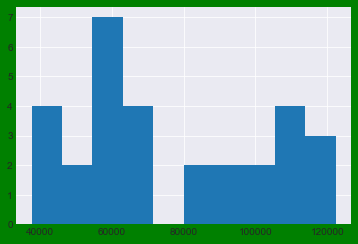

{'whiskers': [<matplotlib.lines.Line2D at 0x26ce385feb0>,
 'caps': [<matplotlib.lines.Line2D at 0x26ce38635b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26ce385fb50>],
 'medians': [<matplotlib.lines.Line2D at 0x26ce3863c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x26ce3863fd0>],
 'means': []}

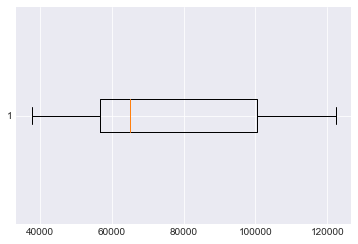

In [180]:
plt.figure(facecolor = "green")
plt.hist(Salary.Salary, bins = 10)
plt.show()
plt.boxplot(Salary.Salary,vert = False)

In [181]:
Salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [182]:
Salary.shape

(30, 2)

### Using sklearn

In [183]:
lm = LinearRegression()
X2 = Salary.YearsExperience.values.reshape(30,1)
Y2 = Salary.Salary.values.reshape(30,1)
S_sklearn = lm.fit(X2,Y2)
print(S_sklearn.coef_)
print(S_sklearn.intercept_)

[[9449.96232146]]
[25792.20019867]


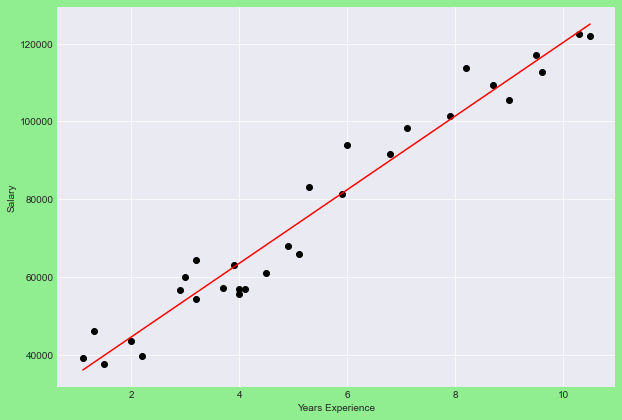

In [184]:
plt.figure(figsize = (10,7), facecolor = "lightgreen")
plt.scatter(Salary.YearsExperience, Salary.Salary, color = "black")
plt.plot(Salary.YearsExperience, Salary.YearsExperience*S_sklearn.coef_[0] + S_sklearn.intercept_, color = "red")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

In [185]:
pred_salary_lm = S_sklearn.predict(X2)
r2_score(Salary["Salary"], pred_salary_lm)

0.9569566641435086

### Using Statsmodels

In [188]:
Salary_model1 = smf.ols("Salary~YearsExperience", data = Salary).fit()
Salary_model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [189]:
Salary_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           1.14e-20
Time:                        01:05:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
Salary_model2 = smf.ols("np.log(Salary)~YearsExperience", data = Salary).fit()
Salary_model2.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [192]:
Salary_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           7.03e-18
Time:                        01:06:31   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
Salary_model3 = smf.ols("Salary~np.log(YearsExperience)", data = Salary).fit()
Salary_model3.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [194]:
Salary_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           3.25e-13
Time:                        01:07:23   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""